
# Bike Sharing - Parte 1: EDA y Limpieza de Datos

**Objetivo:** Realizar un análisis exploratorio y limpieza del dataset `bike_sharing_modified.csv`, 
eliminando valores nulos, inconsistentes, vacíos, outliers e inválidos.  
Se utiliza el dataset `bike_sharing_original.csv` como referencia para comparar resultados.

---


In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


## 1. Carga de datos

In [174]:
df_original = pd.read_csv("../data/raw/bike_sharing_original.csv")
df_modified = pd.read_csv("../data/raw/bike_sharing_modified.csv")


print("Tamaño dataset original:", df_original.shape)
print("Tamaño dataset modificado:", df_modified.shape)

display(df_modified.head())


Tamaño dataset original: (17379, 17)
Tamaño dataset modificado: (17726, 18)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mixed_type_col
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,702
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0,831
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0,175
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,581
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,659


## 2. Inspección inicial del dataset modificado

In [175]:

print("\n--- Información general ---")
df_modified.info()

print("\n--- Descripción estadística ---")
display(df_modified.describe(include='all').T)



--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17726 entries, 0 to 17725
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   instant         17524 non-null  object
 1   dteday          17542 non-null  object
 2   season          17519 non-null  object
 3   yr              17515 non-null  object
 4   mnth            17515 non-null  object
 5   hr              17489 non-null  object
 6   holiday         17552 non-null  object
 7   weekday         17539 non-null  object
 8   workingday      17527 non-null  object
 9   weathersit      17526 non-null  object
 10  temp            17546 non-null  object
 11  atemp           17534 non-null  object
 12  hum             17512 non-null  object
 13  windspeed       17545 non-null  object
 14  casual          17523 non-null  object
 15  registered      17530 non-null  object
 16  cnt             17534 non-null  object
 17  mixed_type_col  15973

,count,unique,top,freq
instant,17524,17085,error,23
dteday,17542,1253,2012-09-08,26
season,17519,155,3.0,4243
yr,17515,128,1.0,8224
mnth,17515,190,7.0,1422
hr,17489,218,20.0,701
holiday,17552,101,0.0,16048
weekday,17539,168,6.0,2386
workingday,17527,119,1.0,11225
weathersit,17526,172,1.0,10809


## 3. Convertir columnas numericas a int64

In [176]:
num_cols = df_modified.columns[np.r_[0, 10:17]]
num_cols

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [177]:
df_modified[num_cols] = df_modified[num_cols].apply(pd.to_numeric, errors='coerce')

In [178]:
print("\n--- Descripción estadística ---")
display(df_modified.describe(include='all').T)


--- Descripción estadística ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17453.0,NaN,NaN,NaN,10899.95697,43168.6351,1.0,4378.0,8730.0,13092.0,1585271.0
dteday,17542,1253,2012-09-08,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17519,155,3.0,4243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,17515,128,1.0,8224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,17515,190,7.0,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,17489,218,20.0,701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,17552,101,0.0,16048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17539,168,6.0,2386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,17527,119,1.0,11225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,17526,172,1.0,10809,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
print("\n--- Información general ---")
df_modified.info()


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17726 entries, 0 to 17725
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         17453 non-null  float64
 1   dteday          17542 non-null  object 
 2   season          17519 non-null  object 
 3   yr              17515 non-null  object 
 4   mnth            17515 non-null  object 
 5   hr              17489 non-null  object 
 6   holiday         17552 non-null  object 
 7   weekday         17539 non-null  object 
 8   workingday      17527 non-null  object 
 9   weathersit      17526 non-null  object 
 10  temp            17490 non-null  float64
 11  atemp           17474 non-null  float64
 12  hum             17449 non-null  float64
 13  windspeed       17479 non-null  float64
 14  casual          17454 non-null  float64
 15  registered      17470 non-null  float64
 16  cnt             17479 non-null  float64
 17  mi

## 4. Detección de valores nulos y únicos

In [180]:

print("\n--- Valores nulos ---")
display(df_modified.isnull().sum())


--- Valores nulos ---


instant            273
dteday             184
season             207
yr                 211
mnth               211
hr                 237
holiday            174
weekday            187
workingday         199
weathersit         200
temp               236
atemp              252
hum                277
windspeed          247
casual             272
registered         256
cnt                247
mixed_type_col    1753
dtype: int64

In [205]:
print("\n--- Conteo de valores únicos por columna ---")
col='hr'
print(f"\nColumna: {col}")
    
    # Conteo total de valores únicos
num_unique = df_modified[col].nunique(dropna=False)
print(f"Total de valores únicos (incluyendo NaN): {num_unique}\n")
    
    # Frecuencia de cada valor
value_counts = df_modified[col].value_counts(dropna=False)
    
    # Imprimir tabla formateada
for val, count in value_counts.items():
    print(f"  {repr(val)}: {count}")


--- Conteo de valores únicos por columna ---

Columna: hr
Total de valores únicos (incluyendo NaN): 219

  '20.0': 701
  '16.0': 699
  '19.0': 697
  '9.0': 695
  '14.0': 694
  '22.0': 694
  '13.0': 693
  '11.0': 692
  '15.0': 691
  '17.0': 689
  '1.0': 689
  '12.0': 688
  '18.0': 687
  '7.0': 686
  '0.0': 682
  '21.0': 680
  '10.0': 676
  '23.0': 675
  '6.0': 674
  '8.0': 674
  '2.0': 666
  '5.0': 662
  '4.0': 659
  '3.0': 658
  nan: 237
  ' 8.0 ': 46
  ' 5.0 ': 46
  ' 23.0 ': 45
  ' 6.0 ': 44
  ' 18.0 ': 43
  ' 2.0 ': 43
  ' 21.0 ': 40
  ' 10.0 ': 39
  ' 14.0 ': 37
  ' 13.0 ': 36
  ' 0.0 ': 36
  ' 9.0 ': 35
  ' 22.0 ': 35
  ' 3.0 ': 35
  ' 16.0 ': 34
  ' 19.0 ': 33
  ' 11.0 ': 33
  ' 12.0 ': 32
  ' 15.0 ': 31
  ' 17.0 ': 30
  ' 4.0 ': 30
  ' 20.0 ': 28
  ' 1.0 ': 24
  ' 7.0 ': 23
  'invalid': 21
  'error': 17
  '?': 10
  ' NAN ': 5
  '660.0': 2
  '335.0': 2
  '272.0': 2
  '408.0': 2
  '732.0': 2
  '804.0': 2
  '522.0': 2
  '380.0': 2
  '781.0': 2
  '737.0': 2
  '741.0': 2
  '235.0': 

## 5. Limpieza de valores nulos e invalidos: variables categoricas

In [187]:
cat_valid_values = {
    "season": {1.0, 2.0, 3.0, 4.0},
    "yr": {0.0, 1.0},
    "mnth": set(float(i) for i in range(1, 13)),     # 1.0 a 12.0
    "hr": set(float(i) for i in range(0, 24)),       # 0.0 a 23.0
    "holiday": {0.0, 1.0},
    "weekday": set(float(i) for i in range(0, 7)),   # 0 a 6.0
    "workingday": {0.0, 1.0},
    "weathersit": {1.0, 2.0, 3.0, 4.0}
}
cat_valid_values

{'season': {1.0, 2.0, 3.0, 4.0},
 'yr': {0.0, 1.0},
 'mnth': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0},
 'hr': {0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0},
 'holiday': {0.0, 1.0},
 'weekday': {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0},
 'workingday': {0.0, 1.0},
 'weathersit': {1.0, 2.0, 3.0, 4.0}}

In [259]:
# Crear copia para mantener df_modified intacto
df_clean = df_modified.copy()

# Seleccionar columnas categóricas
cat_cols = df_clean.select_dtypes(include='object').columns

for col in cat_cols:
    # Reemplazar NaN por la moda
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    
    # Convertir a string y eliminar espacios al inicio y final
    df_clean[col] = df_clean[col].astype(str).str.strip().astype('object')
    

/var/folders/m2/n5j6l1lj2y33kjwsgnrf0x_00000gn/T/ipykernel_19642/3062045686.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
/var/folders/m2/n5j6l1lj2y33kjwsgnrf0x_00000gn/T/ipykernel_19642/3062045686.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [260]:
# Eliminación de valores no numéricos y sustitución de inválidos por la moda

for col in cat_cols:
    if col in cat_valid_values:
        valid_set = set(map(float, cat_valid_values[col]))  # Convertir a float para comparación coherente
        # valid_set = set(map(str, cat_valid_values[col]))  # Convertir a string para comparación coherente

        
        # # Intentar convertir todos los valores a numéricos, marcando como NaN los no convertibles
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        # Contar y eliminar filas con valores no numéricos (convertidos a NaN)
        non_numeric_count = df_clean[col].isna().sum()
        if non_numeric_count > 0:
            print(f"Se eliminarán {non_numeric_count} registros con valores no numericos en '{col}'.")
            df_clean = df_clean.dropna(subset=[col])
        
        # Detectar valores fuera del conjunto válido
        invalid_mask = ~df_clean[col].isin(valid_set)
        invalid_count = invalid_mask.sum()
        
        # Reemplazar valores inválidos por la moda
        if invalid_count > 0:
            moda = df_clean[col].mode()[0]
            print(f"{invalid_count} valores invalidos en '{col}' fueron reemplazados por la moda ({moda}).")
            df_clean.loc[invalid_mask, col] = moda

Se eliminarán 57 registros con valores no numericos en 'season'.
168 valores invalidos en 'season' fueron reemplazados por la moda (3.0).
Se eliminarán 63 registros con valores no numericos en 'yr'.
135 valores invalidos en 'yr' fueron reemplazados por la moda (1.0).
Se eliminarán 69 registros con valores no numericos en 'mnth'.
174 valores invalidos en 'mnth' fueron reemplazados por la moda (7.0).
Se eliminarán 56 registros con valores no numericos en 'hr'.
173 valores invalidos en 'hr' fueron reemplazados por la moda (20.0).
Se eliminarán 74 registros con valores no numericos en 'holiday'.
94 valores invalidos en 'holiday' fueron reemplazados por la moda (0.0).
Se eliminarán 59 registros con valores no numericos en 'weekday'.
154 valores invalidos en 'weekday' fueron reemplazados por la moda (6.0).
Se eliminarán 62 registros con valores no numericos en 'workingday'.
115 valores invalidos en 'workingday' fueron reemplazados por la moda (1.0).
Se eliminarán 65 registros con valores no 

In [261]:
for col in cat_cols[1:9]:
    df_clean[col] = df_clean[col].astype(float).astype(int).astype(str).astype('object')

In [262]:
print("\n--- Conteo de valores únicos por columna en df_clean---")
for col in cat_cols:
    print(f"\nColumna: {col}")
    
    # Conteo total de valores únicos
    num_unique = df_clean[col].nunique(dropna=False)
    print(f"Total de valores únicos (incluyendo NaN): {num_unique}\n")
    
    # Frecuencia de cada valor
    value_counts = df_clean[col].value_counts(dropna=False)
    
    # Imprimir tabla formateada
    for val, count in value_counts.items():
        print(f"  {repr(val)}: {count}")


--- Conteo de valores únicos por columna en df_clean---

Columna: dteday
Total de valores únicos (incluyendo NaN): 732

  '2011-01-17': 204
  '2012-11-26': 27
  '2011-12-27': 27
  '2011-12-08': 27
  '2012-07-26': 26
  '2011-11-12': 26
  '2012-07-08': 26
  '2012-04-26': 26
  '2012-07-06': 26
  '2011-11-13': 26
  '2012-08-11': 26
  '2011-11-01': 26
  '2012-08-13': 26
  '2011-09-26': 26
  '2011-07-29': 26
  '2012-09-08': 26
  '2011-10-25': 26
  '2012-02-05': 26
  '2011-11-21': 26
  '2011-07-21': 26
  '2012-08-28': 26
  '2011-04-05': 26
  '2012-12-25': 26
  '2012-09-13': 25
  '2011-06-07': 25
  '2012-10-14': 25
  '2012-05-10': 25
  '2012-06-08': 25
  '2011-05-31': 25
  '2011-12-10': 25
  '2012-09-09': 25
  '2012-06-03': 25
  '2012-09-10': 25
  '2011-04-15': 25
  '2011-12-06': 25
  '2011-05-01': 25
  '2011-05-04': 25
  '2011-05-14': 25
  '2011-12-04': 25
  '2011-11-29': 25
  '2011-04-24': 25
  '2011-11-14': 25
  '2011-05-07': 25
  '2011-11-18': 25
  '2012-05-19': 25
  '2012-06-19': 25
  '2

In [263]:
df_clean[cat_cols].head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,mixed_type_col
0,2011-01-01,1,0,1,0,0,6,0,1,702
1,2011-01-01,1,0,1,1,0,6,0,1,831
2,2011-01-01,1,0,1,2,0,6,0,1,175
3,2011-01-01,1,0,1,3,0,6,0,1,581
4,2011-01-01,1,0,1,4,0,6,0,1,659


In [237]:
print("\n--- Valores nulos df_clean ---")
display(df_clean.isnull().sum())


--- Valores nulos df_clean ---


instant           268
dteday              0
season              0
yr                  0
mnth                0
hr                  0
holiday             0
weekday             0
workingday          0
weathersit          0
temp              227
atemp             249
hum               266
windspeed         239
casual            263
registered        248
cnt               239
mixed_type_col      0
dtype: int64

## 6. Limpieza valores nulos y eliminación de outliers (IQR): variables númericas

In [264]:
df_clean[num_cols] = df_clean[num_cols].apply(lambda x: x.fillna(x.median()))

In [265]:
print("\n--- Valores nulos df_clean ---")
display(df_clean.isnull().sum())


--- Valores nulos df_clean ---


instant           0
dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
mixed_type_col    0
dtype: int64

In [266]:

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

outlier_cols = []
for col in num_cols:
    outliers = detect_outliers_iqr(df_clean[col])
    percent = 100 * outliers.sum() / len(df_clean)
    if percent > 0:
        outlier_cols.append((col, percent))
        print(f"{col}: {percent:.2f}% outliers")

# Eliminar outliers extremos
for col, _ in outlier_cols:
    df_clean = df_clean[~detect_outliers_iqr(df_clean[col])]


instant: 0.41% outliers
temp: 1.03% outliers
atemp: 1.12% outliers
hum: 1.05% outliers
windspeed: 2.83% outliers
casual: 7.41% outliers
registered: 4.47% outliers
cnt: 3.43% outliers


## 8. Verificación final de limpieza

In [267]:

print("\n--- Valores nulos después de limpieza ---")
display(df_clean.isnull().sum())

print("\n--- Dimensiones después de limpieza ---")
print(df_clean.shape)



--- Valores nulos después de limpieza ---


instant           0
dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
mixed_type_col    0
dtype: int64


--- Dimensiones después de limpieza ---
(13900, 18)


## 9. Distribución de las variables numéricas

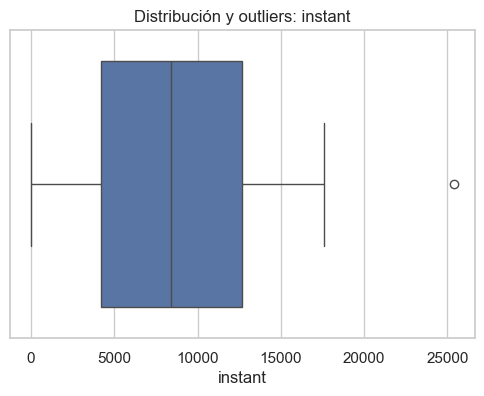

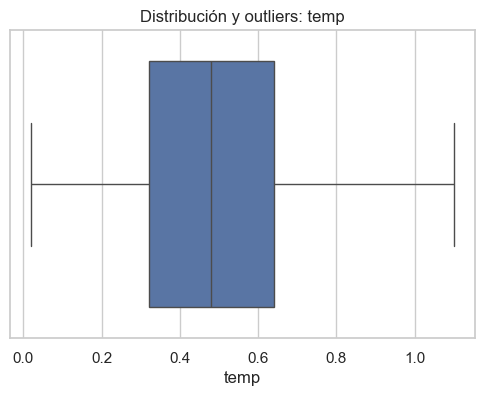

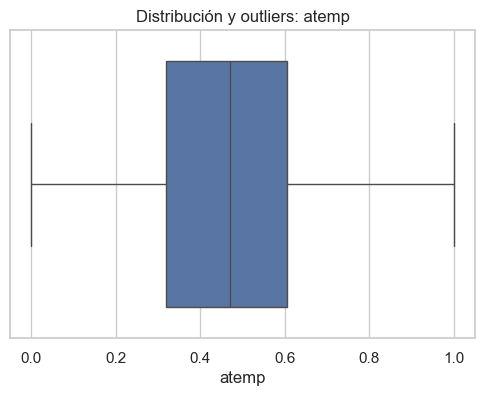

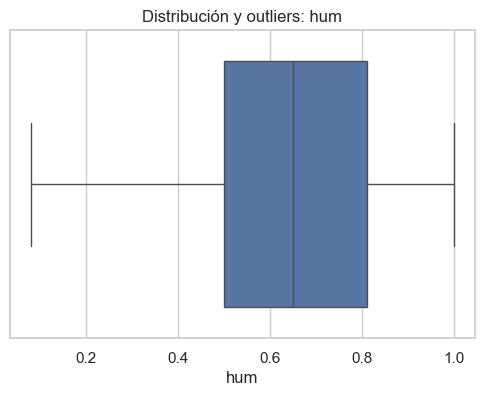

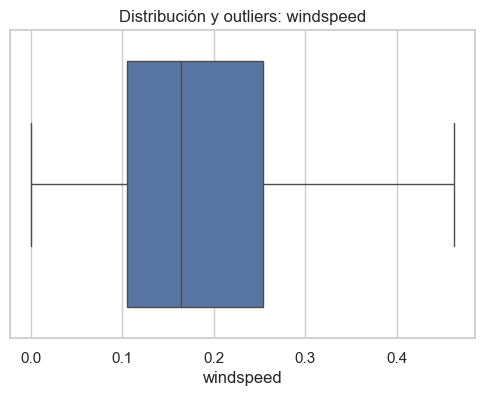

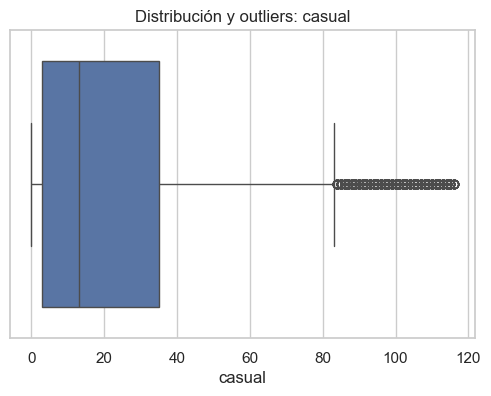

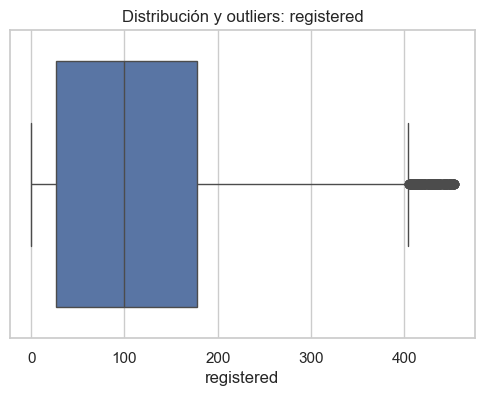

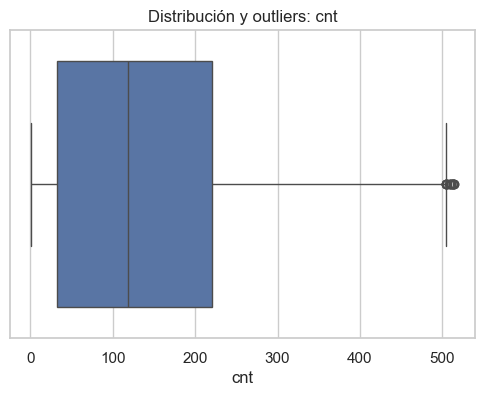

In [268]:

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Distribución y outliers: {col}")
    plt.show()


## 10. Comparación de métricas con dataset original

In [269]:

summary = pd.DataFrame({
    'original_mean': df_original[num_cols].mean(),
    'modified_mean': df_modified[num_cols].mean(),
    'clean_mean': df_clean[num_cols].mean(),
    'original_std': df_original[num_cols].std(),
    'clean_std': df_clean[num_cols].std()
})

display(summary.round(2))


,original_mean,modified_mean,clean_mean,original_std,clean_std
instant,8690.00,10899.96,8445.91,5017.03,4994.45
temp,0.50,3.58,0.48,0.19,0.19
atemp,0.48,3.82,0.46,0.17,0.17
hum,0.63,5.32,0.65,0.19,0.19
windspeed,0.19,2.95,0.18,0.12,0.11
casual,35.68,48.65,23.22,49.31,26.25
registered,153.79,182.23,118.36,151.36,104.04
cnt,189.46,241.86,141.89,181.39,121.70


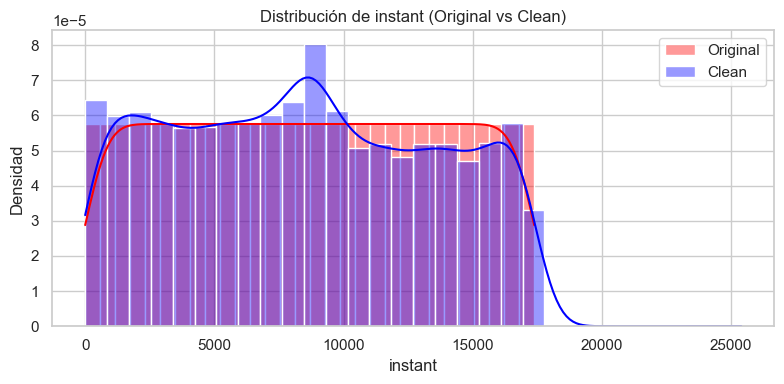

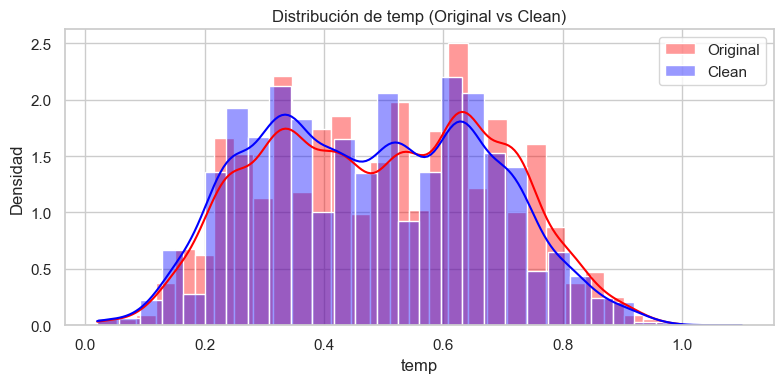

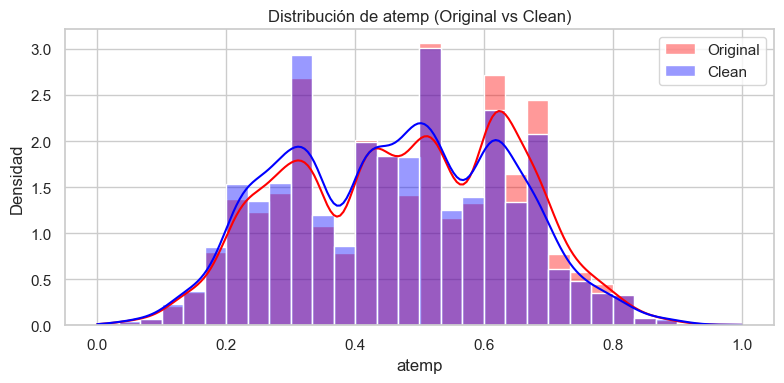

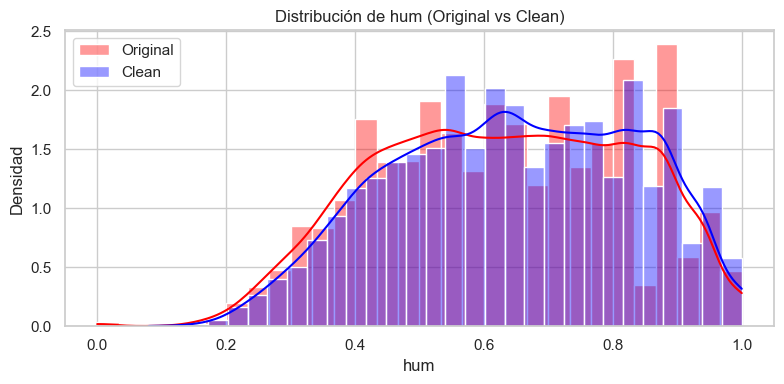

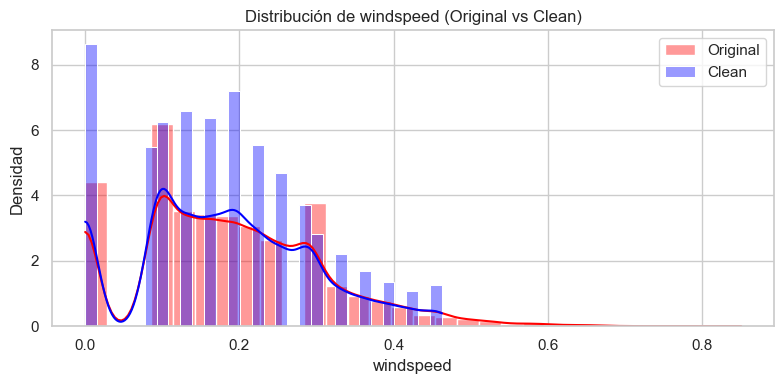

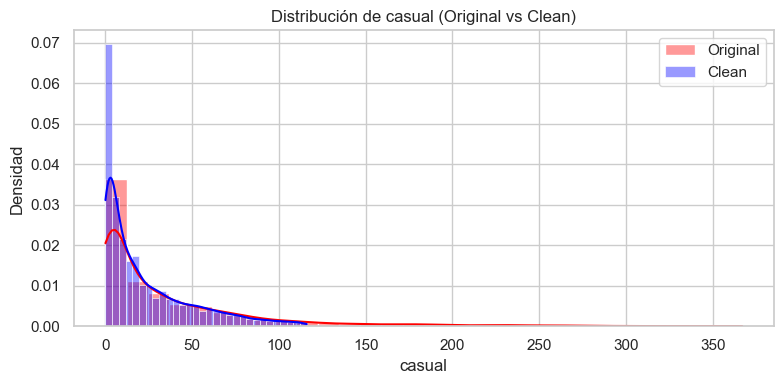

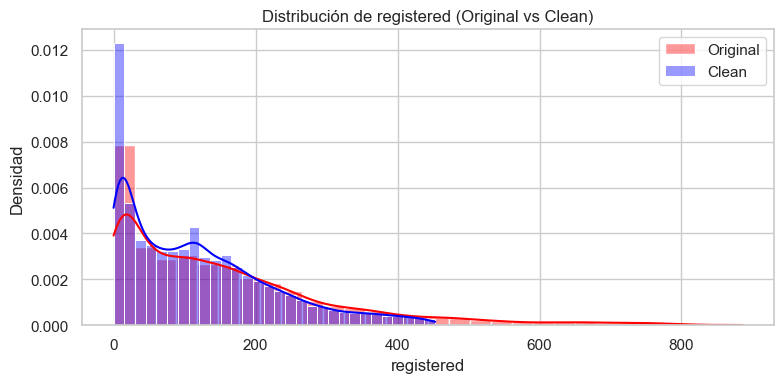

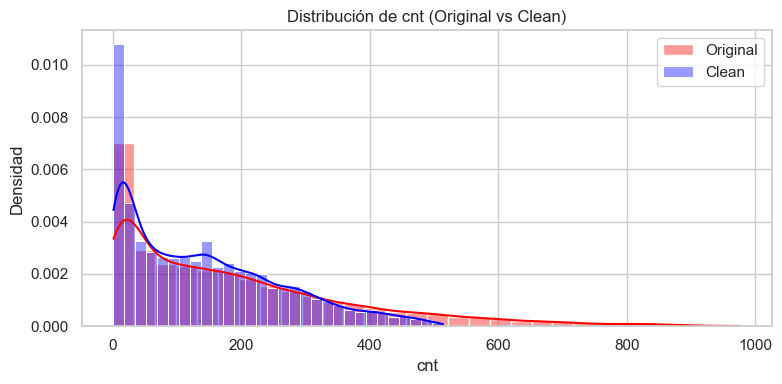

In [270]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_original[col], color='red', label='Original', kde=True, stat='density', bins=30, alpha=0.4)
    sns.histplot(df_clean[col], color='blue', label='Clean', kde=True, stat='density', bins=30, alpha=0.4)
    plt.title(f"Distribución de {col} (Original vs Clean)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.legend()
    plt.tight_layout()
    plt.show()

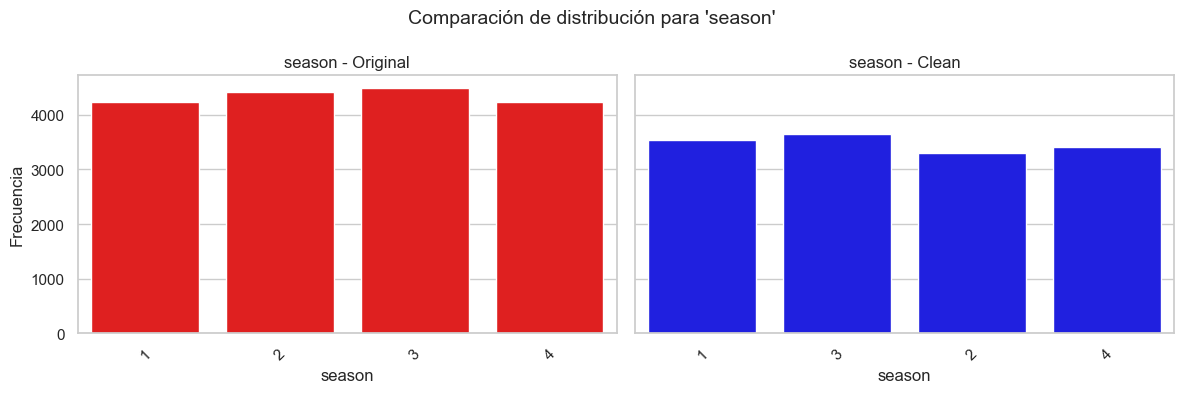

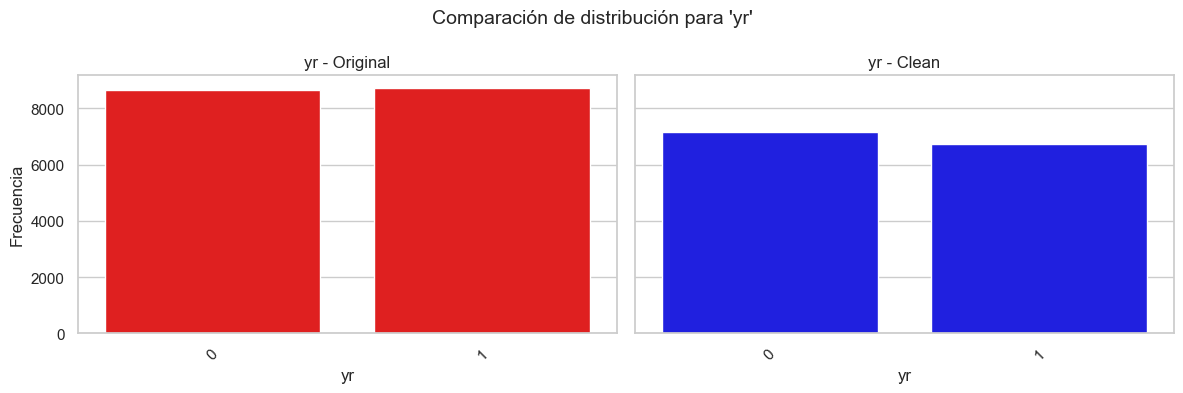

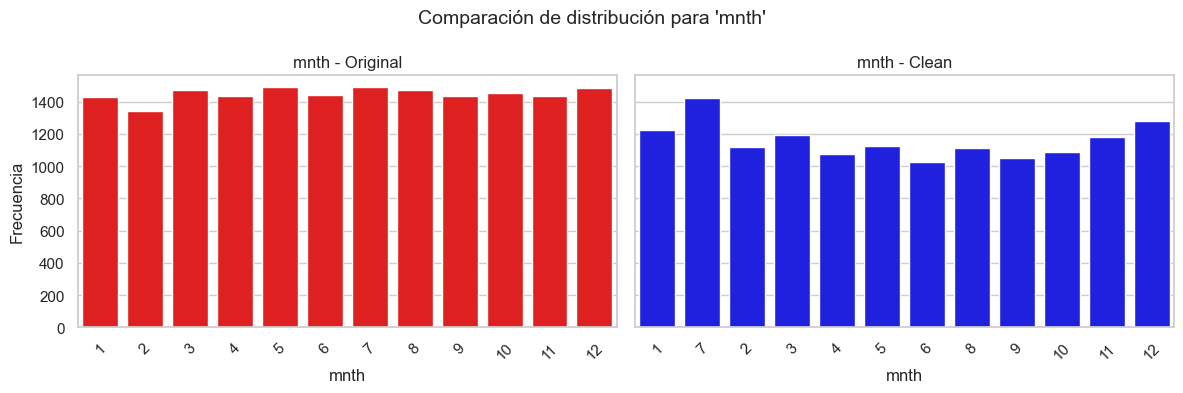

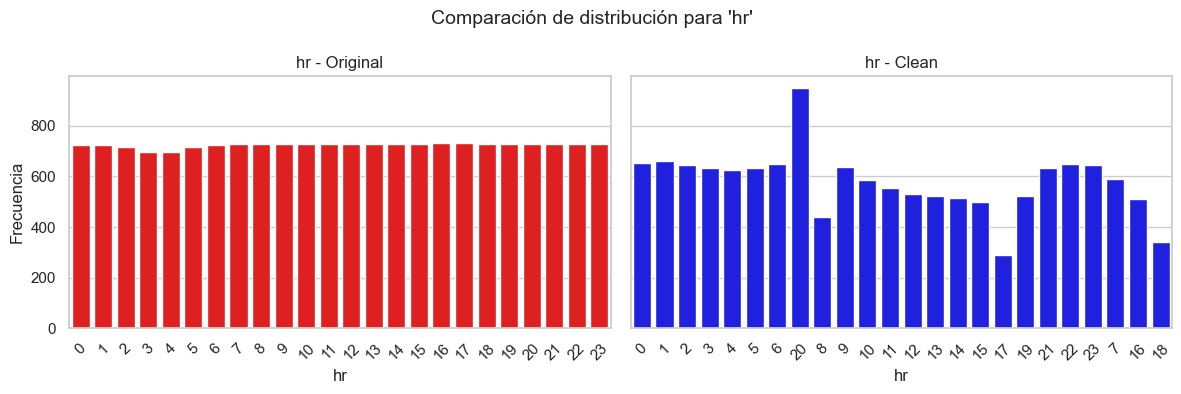

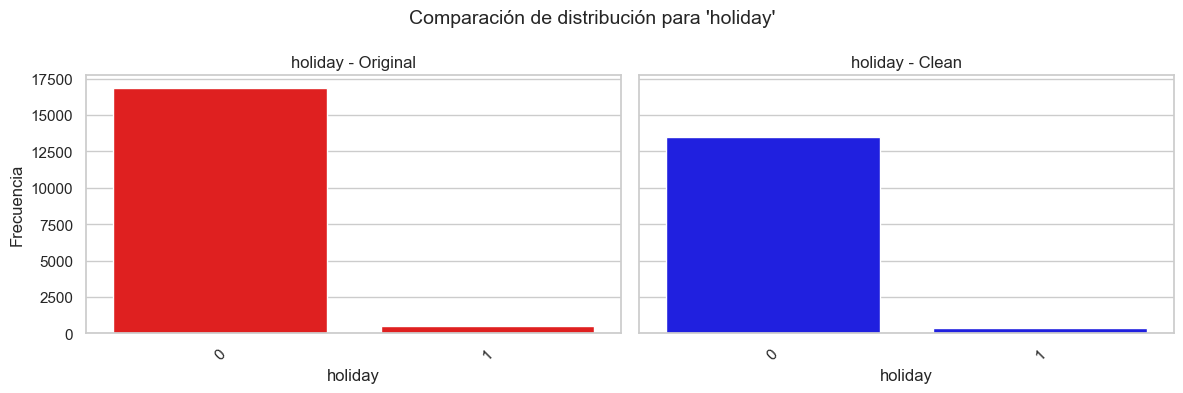

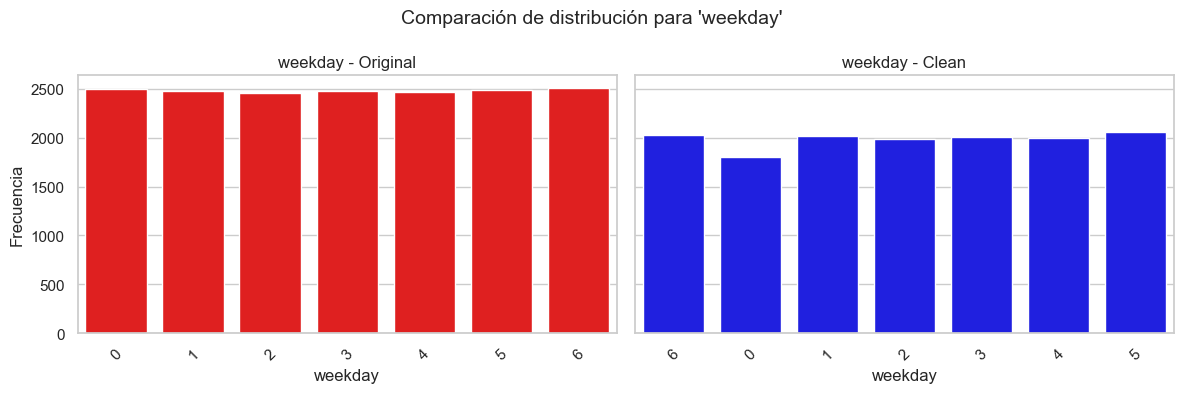

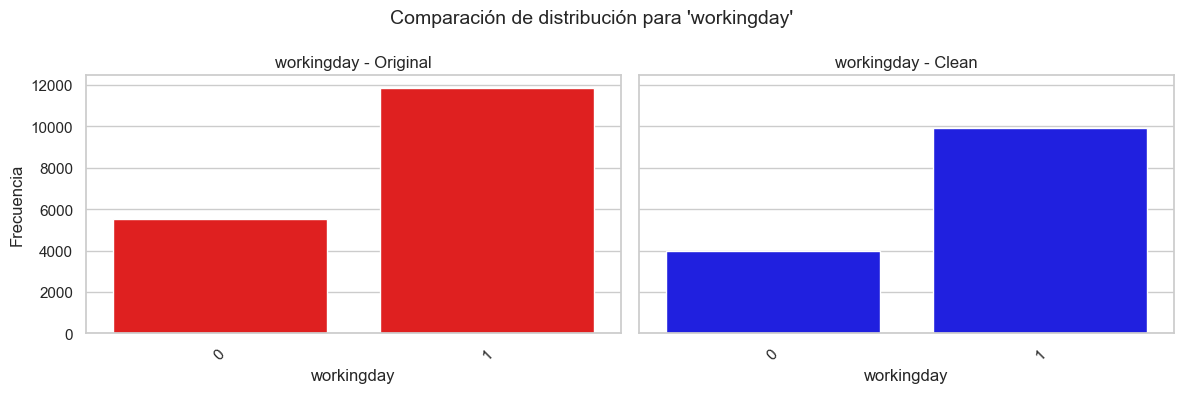

In [271]:
for col in cat_cols[1:8]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    # Original
    sns.countplot(x=df_original[col], ax=axes[0], color='red')
    axes[0].set_title(f"{col} - Original")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frecuencia")
    axes[0].tick_params(axis='x', rotation=45)
    
    # Clean
    sns.countplot(x=df_clean[col], ax=axes[1], color='blue')
    axes[1].set_title(f"{col} - Clean")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frecuencia")
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.suptitle(f"Comparación de distribución para '{col}'", fontsize=14)
    plt.tight_layout()
    plt.show()

## 11. Guardar dataset limpio

In [272]:

df_clean.to_csv("../data/processed/bike_sharing_cleaned_v3.csv", index=False)


## 12. Análisis exploratorio de datos utilizando visualizaciones y estadísticas descriptivas.

In [273]:
# Información general
print("Forma del dataset:", df_clean.shape)
print("\\nColumnas:", list(df_clean.columns))
print("\\nTipos de datos:")
print(df_clean.dtypes)
print("\\nValores nulos:")
print(df_clean.isnull().sum())
print("\\nEstadísticas descriptivas:")
print(df_clean.describe())

Forma del dataset: (13900, 18)
\nColumnas: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'mixed_type_col']
\nTipos de datos:
instant           float64
dteday             object
season             object
yr                 object
mnth               object
hr                 object
holiday            object
weekday            object
workingday         object
weathersit         object
temp              float64
atemp             float64
hum               float64
windspeed         float64
casual            float64
registered        float64
cnt               float64
mixed_type_col     object
dtype: object
\nValores nulos:
instant           0
dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum         

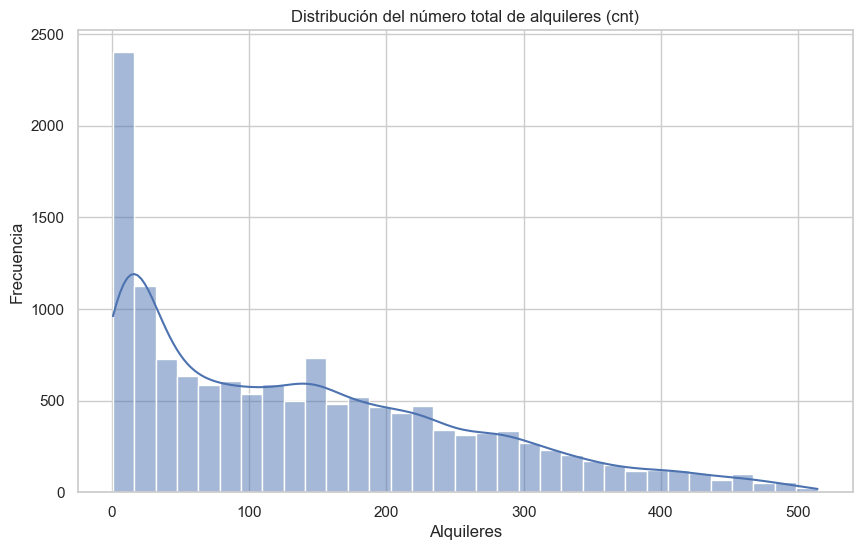

In [274]:
# Distribución de alquileres (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['cnt'], kde=True)
plt.title('Distribución del número total de alquileres (cnt)')
plt.xlabel('Alquileres')
plt.ylabel('Frecuencia')
plt.show()

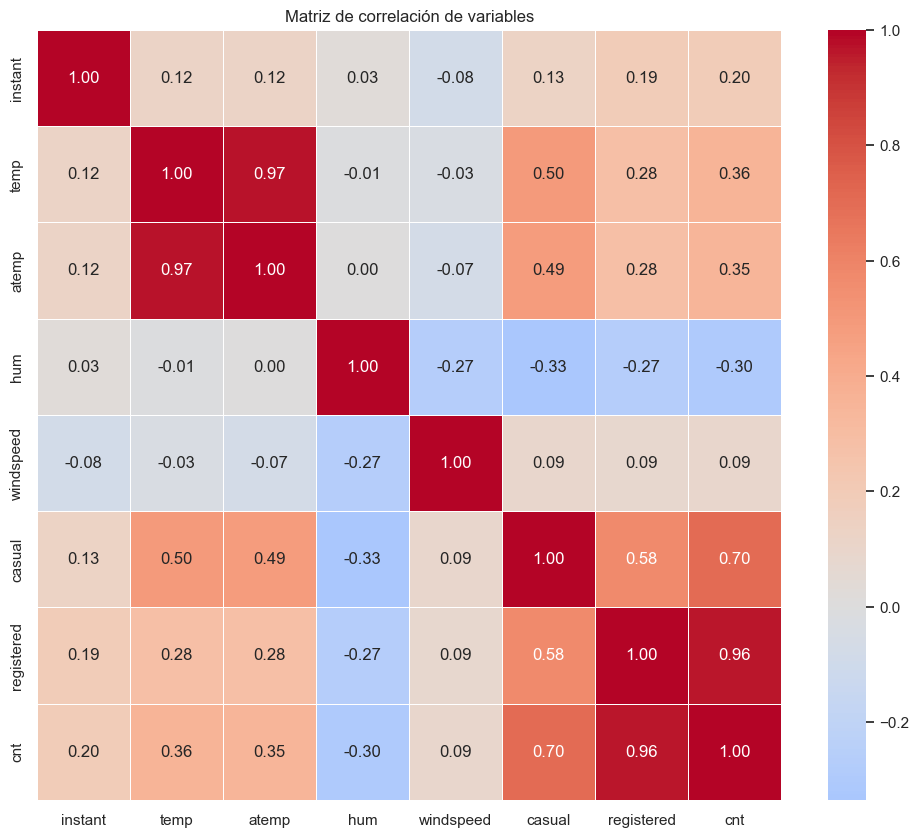

In [275]:
# Correlación entre variables numéricas
plt.figure(figsize=(12, 10))
corr = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de correlación de variables')
plt.show()

/var/folders/m2/n5j6l1lj2y33kjwsgnrf0x_00000gn/T/ipykernel_19642/1931812124.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt', data=df_clean, estimator=np.mean, ci=None)


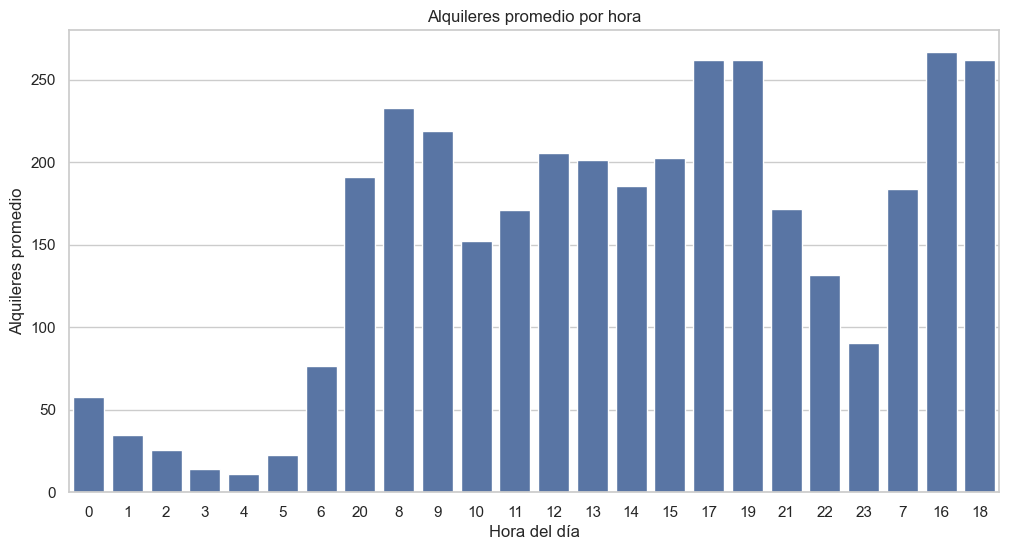

In [276]:
# Alquileres por hora del día
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=df_clean, estimator=np.mean, ci=None)
plt.title('Alquileres promedio por hora')
plt.xlabel('Hora del día')
plt.ylabel('Alquileres promedio')
plt.show()

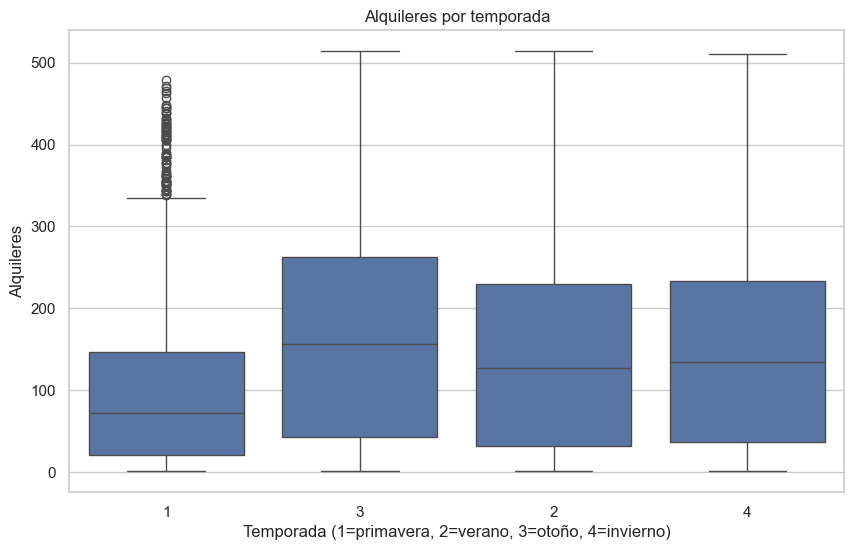

In [277]:
# Alquileres por temporada
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_clean)
plt.title('Alquileres por temporada')
plt.xlabel('Temporada (1=primavera, 2=verano, 3=otoño, 4=invierno)')
plt.ylabel('Alquileres')
plt.show()

## 13. Eliminación de multiconealidad y variables no utilizadas

In [278]:
drop_col = ['atemp', 'registered', 'casual', 'instant']

df_clean.drop(columns=drop_col, inplace=True)


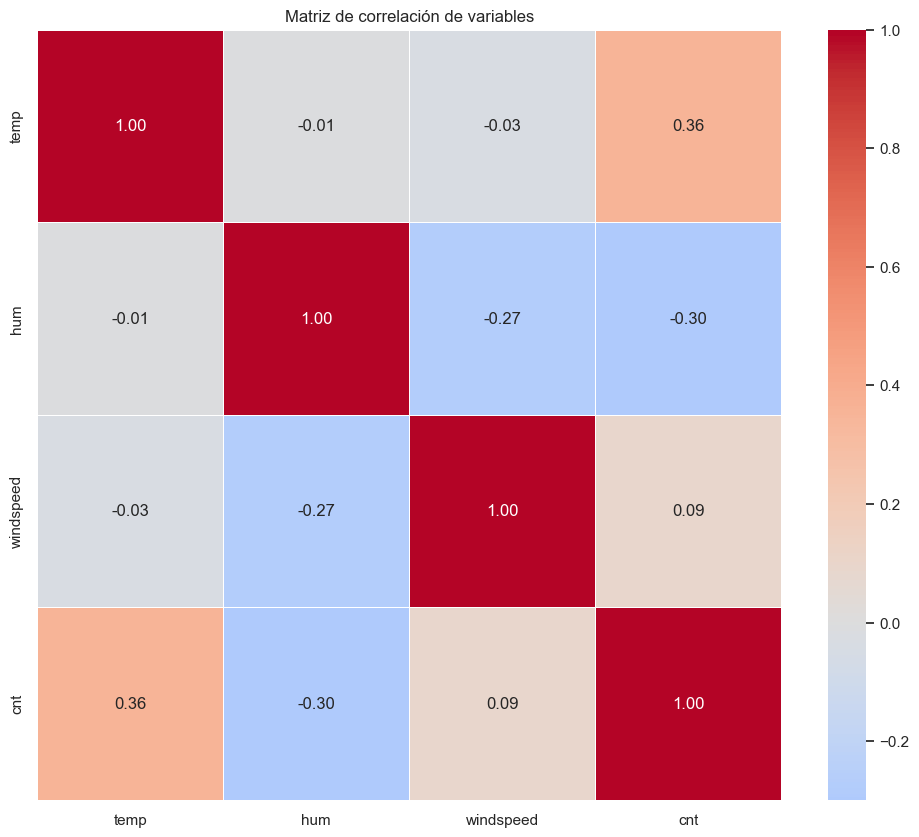

In [279]:
# Correlación entre variables numéricas
plt.figure(figsize=(12, 10))
corr = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de correlación de variables')
plt.show()

## 14. Preprocesamiento de datos

Las variables como season, weathersit, weekday, mnth son categóricas pero numéricas. Deben convertirse a categóricas y luego codificarse.

In [280]:
# Convertir a categóricas
categorical_cols = ['season', 'weathersit', 'weekday', 'mnth', 'hr', 'holiday', 'workingday']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

# Crear variables dummies (one-hot encoding)
df_encoded = pd.get_dummies(df_clean, columns=['season', 'weathersit', 'weekday', 'mnth', 'hr'], drop_first=True)

Usa StandardScaler para normalizar variables continuas como temp, atemp, hum, windspeed.

In [281]:
from sklearn.preprocessing import StandardScaler

# Variables a escalar
numeric_cols = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Datos normalizados:")
print(df_encoded[numeric_cols].describe())

Datos normalizados:
               temp           hum     windspeed
count  1.390000e+04  1.390000e+04  1.390000e+04
mean  -1.390415e-16 -5.070924e-16 -1.962938e-16
std    1.000036e+00  1.000036e+00  1.000036e+00
min   -2.422776e+00 -3.023060e+00 -1.610855e+00
25%   -8.403785e-01 -7.789613e-01 -6.756822e-01
50%    3.567036e-03  2.250249e-02 -1.414257e-01
75%    8.475126e-01  8.773972e-01  6.595116e-01
max    3.273856e+00  1.892585e+00  2.529857e+00


Si el dataset tiene muchas columnas después de one-hot, puedes usar PCA.

In [282]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparar datos para PCA (solo numéricos)
features = df_encoded.drop(columns=['dteday', 'cnt', 'mixed_type_col'])

# Escalar antes de PCA
scaler_pca = StandardScaler()
features_scaled = scaler_pca.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=10)  # Reducir a 10 componentes
pca_features = pca.fit_transform(features_scaled)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.05310938 0.04432182 0.03678945 0.03447223 0.0278732  0.02681711
 0.02481857 0.02300459 0.02292434 0.02249904]
Varianza total explicada: 0.31662972566864295


Resultados esperados
EDA completo con visualizaciones que muestran patrones temporales, correlaciones y distribuciones.

Variables categóricas codificadas para uso en modelos (como regresión o árboles).

Datos normalizados para algoritmos sensibles a escala (como SVM, KNN, redes neuronales).

Reducción de dimensionalidad si se requiere eficiencia o eliminación de ruido.

In [283]:
# Exportación df_encoded

df_encoded.to_csv("../data/processed/bike_sharing_encoded.csv", index=False)